<a href="https://colab.research.google.com/github/sara-then/HGF-drugdiscovery-project/blob/main/project_drugdiscovery_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Drug Discovery Project (Part 2)
Part 2: Exploratory Data Analysis 

In [ ]:
# install conda and rdkit
%%capture
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
# importing libraries 
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## Loading pre-processed bioactivity data 

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

## Calculating Lipinski Descriptors
Evaluate the drugability of a compound.
Lipinski's Rule of 5:

* Molecular weight < 500 Dalton  
* < 5 hydrogen bond donors 
* < 10 hydrogen bond acceptors
* Octanol-water partition (logP) < 5



In [ ]:
def lipinski(smiles, verbose=False):
  """
    Function calculates Lipinski descriptors by taking input of canonical smiles
    (molecule makeup of compound)
    :param smiles: list of canonical smiles notation
    :return: dataframe with calculated Lipinski descriptors 
  """

  moldata= []
  for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
  baseData= np.arange(1,1)
  i=0  
  for mol in moldata:        
       
      desc_MolWt = Descriptors.MolWt(mol)
      desc_MolLogP = Descriptors.MolLogP(mol)
      desc_NumHDonors = Lipinski.NumHDonors(mol)
      desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
      row = np.array([desc_MolWt,
                      desc_MolLogP,
                      desc_NumHDonors,
                      desc_NumHAcceptors])   
    
      if(i==0):
          baseData=row
      else:
          baseData=np.vstack([baseData, row])
      i=i+1      
    
  columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
  descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
  return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,501.627,6.03750,3.0,7.0
1,291.354,3.62150,2.0,2.0
2,337.810,4.59940,2.0,3.0
3,346.821,5.01260,1.0,4.0
4,484.431,6.54092,2.0,6.0
...,...,...,...,...
4825,567.552,6.37500,1.0,9.0
4826,289.342,3.15328,2.0,4.0
4827,289.342,3.15328,2.0,4.0
4828,385.858,4.94398,2.0,4.0


In [ ]:
# concatenate df_lipinski to pre-processed dataframe, df
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL352308,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,inactive,10000.0,501.627,6.03750,3.0,7.0
1,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,10000.0,291.354,3.62150,2.0,2.0
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,inactive,10000.0,337.810,4.59940,2.0,3.0
3,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,inactive,10000.0,346.821,5.01260,1.0,4.0
4,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,inactive,100000.0,484.431,6.54092,2.0,6.0
...,...,...,...,...,...,...,...,...
4825,CHEMBL4799551,COc1cc2ncnc(Oc3ccc(Nc4nccc5c4c(=O)c(-c4ccc(F)c...,active,82.9,567.552,6.37500,1.0,9.0
4826,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,1.0,289.342,3.15328,2.0,4.0
4827,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,2.9,289.342,3.15328,2.0,4.0
4828,CHEMBL4522773,CC1=C(C#N)[C@@H](c2ccc3[nH]nc(C)c3c2)C(C#N)=C(...,active,11.0,385.858,4.94398,2.0,4.0


### Converting IC50 to pIC50
To improve readability and ease interpretability, IC50 values should be converted to pIC50, the negative log of the IC50 values in molar: -log10(IC50). pIC50 allows for more uniformly distributed data.

Compounds with pIC50 values >6 (IC50 <1000 nM) are considered active/potent. Compounds with pIC50 values <5 (IC50 >10000 nM) are considered inactive/not very potent.

In [ ]:
def pIC50(input_df):
  """
    Function takes input dataframe and converts standard_value_norm 
    column (IC50) to pIC50 values. standard_value_norm column in 
    dataframe will be deleted and replaced with column, pIC50 with 
    calculated values. Function returns input dataframe with pIC50 column 
    and corresponding values. 
    :param input_df: dataframe with IC50 values in standard_value_norm column
    :return: dataframe with calculated pIC50 values and deleted IC50 values
  """

  pIC50 = []

  for i in input_df['standard_value']:
    molar = i*(10**-9)    # converts nM to M
    pIC50.append(-np.log10(molar))    # numpy function to appyly -1og10

  input_df['pIC50'] = pIC50
  x= input_df.drop('standard_value', 1)

  return x

Before converting to pIC50, values will need to be fixed at a maximum of 100,000,000 because any value greater than 100,000,000 will become a negative logarithmic value after conversion. 

In [ ]:
# check if dataframe contains IC50 values greater than 100,000,000
df_combined.standard_value.describe()

count    4.830000e+03
mean     1.229520e+04
std      4.082096e+05
min      1.300000e-01
25%      9.000000e+00
50%      5.100000e+01
75%      7.775000e+02
max      2.000000e+07
Name: standard_value, dtype: float64

Since the dataframe does not contain values great than 100,000,000 (max: 2.000000e+07), we can continue on with converting IC50 values to pIC50

In [ ]:
# applying pIC50 function 
df_final = pIC50(df_combined)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL352308,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,inactive,501.627,6.03750,3.0,7.0,5.000000
1,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,291.354,3.62150,2.0,2.0,5.000000
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,inactive,337.810,4.59940,2.0,3.0,5.000000
3,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,inactive,346.821,5.01260,1.0,4.0,5.000000
4,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,inactive,484.431,6.54092,2.0,6.0,4.000000
...,...,...,...,...,...,...,...,...
4825,CHEMBL4799551,COc1cc2ncnc(Oc3ccc(Nc4nccc5c4c(=O)c(-c4ccc(F)c...,active,567.552,6.37500,1.0,9.0,7.081445
4826,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,289.342,3.15328,2.0,4.0,9.000000
4827,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,289.342,3.15328,2.0,4.0,8.537602
4828,CHEMBL4522773,CC1=C(C#N)[C@@H](c2ccc3[nH]nc(C)c3c2)C(C#N)=C(...,active,385.858,4.94398,2.0,4.0,7.958607


In [ ]:
# saving df_final as csv file for later use
df_final.to_csv('bioactivity_data_3class_pIC50.csv', index=False)

### Removing the "intermediate" bioactivity class
For simplicity, we will only focus on compounds labeled as "inactive" or "active".

In [ ]:
# removing compounds labeled as 'intermediate'
df_2class = df_combined[df_combined.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL352308,COc1cc2c(Oc3ccc(Nc4ccc(C(C)(C)C)cc4)cc3)ccnc2c...,inactive,10000.0,501.627,6.03750,3.0,7.0,5.000000
1,CHEMBL115220,O=C(Cc1ccc2ccccc2c1)Nc1cc(C2CC2)n[nH]1,inactive,10000.0,291.354,3.62150,2.0,2.0,5.000000
2,CHEMBL101683,O=C(Nc1ccc(Cl)cc1)c1ccccc1NCc1ccncc1,inactive,10000.0,337.810,4.59940,2.0,3.0,5.000000
3,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1,inactive,10000.0,346.821,5.01260,1.0,4.0,5.000000
4,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,inactive,100000.0,484.431,6.54092,2.0,6.0,4.000000
...,...,...,...,...,...,...,...,...,...
4825,CHEMBL4799551,COc1cc2ncnc(Oc3ccc(Nc4nccc5c4c(=O)c(-c4ccc(F)c...,active,82.9,567.552,6.37500,1.0,9.0,7.081445
4826,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,1.0,289.342,3.15328,2.0,4.0,9.000000
4827,CHEMBL4593677,CC1=C(C#N)C(c2ccc3[nH]nc(C)c3c2)C(C#N)=C(C)N1,active,2.9,289.342,3.15328,2.0,4.0,8.537602
4828,CHEMBL4522773,CC1=C(C#N)[C@@H](c2ccc3[nH]nc(C)c3c2)C(C#N)=C(...,active,11.0,385.858,4.94398,2.0,4.0,7.958607


## Exploratory Data Analysis via Lipinksi Descriptors 


In [ ]:
# importing necessary libraries 
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the active and inactive bioactivity classes

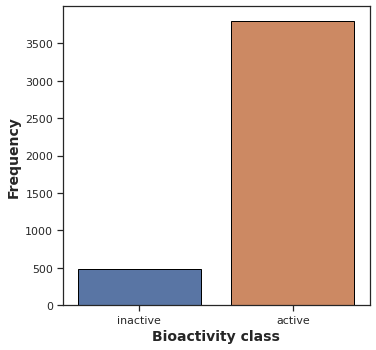

In [ ]:
plt.figure(figsize= (5.5,5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

###Scatterplot of molecular weight versus solubility (LogP)

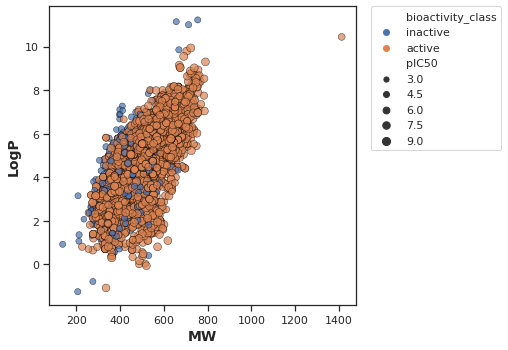

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### Boxplots and Mann-Whitney U Test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  """
  Function takes a specified Lipinski descriptor column and
  performs Mann-Whitney U test which determines whether the distribution is 
  the same for the two bioactivity classes and therefore 
  from the same population.
  :param descriptor: a specified Lipinksi descriptor 
  :return: dataframe with calculated p-value and interpretation of results 
  """
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p-value':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

#### pIC50

Boxplot

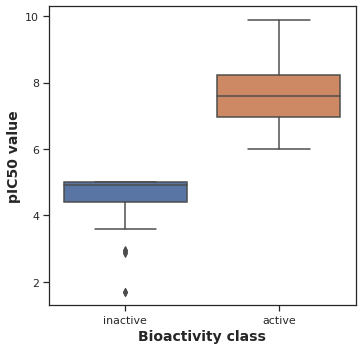

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical Analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p-value,alpha,Interpretation
0,pIC50,0.0,1.939132e-285,0.05,Different distribution (reject H0)


#### MW (molecular weight)

Boxplot

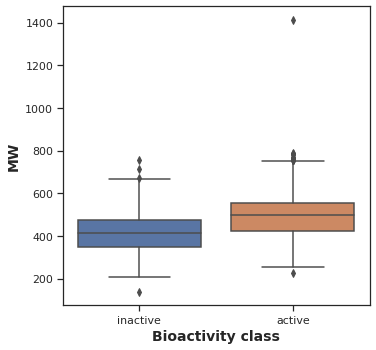

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

Statistical Analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p-value,alpha,Interpretation
0,MW,515543.0,1.053822e-58,0.05,Different distribution (reject H0)


#### LogP

Boxplot


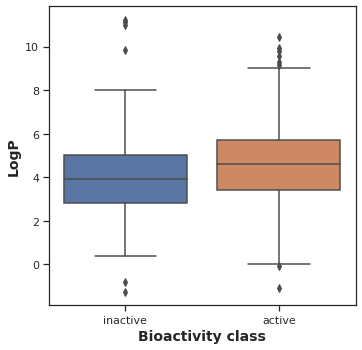

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Statistical Analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p-value,alpha,Interpretation
0,LogP,738620.0,3.983727e-14,0.05,Different distribution (reject H0)


#### Number of Hydrogen Donors

Boxplot

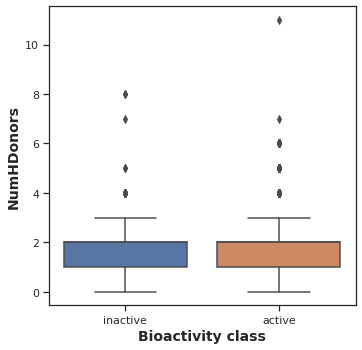

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical Analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHDonors,848548.0,0.000394,0.05,Different distribution (reject H0)


#### Number of Hydrogen Acceptors

Boxplot

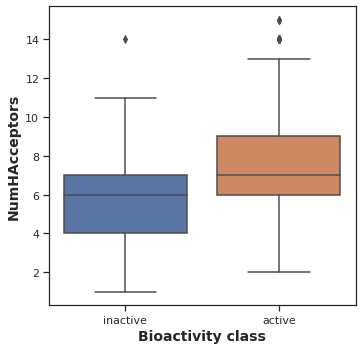

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

Statistical Analysis | Mann-Whitney U Test

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p-value,alpha,Interpretation
0,NumHAcceptors,517864.0,1.361232e-59,0.05,Different distribution (reject H0)


### Intepretation of results


### Zip files

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 12%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: bioactivity_preprocessed_data.csv (deflated 85%)
